In [288]:
# change obv after labeling to be scaled obv
#### method 1 min max scale for all obv and cross
#### method 2 use robust for obvcross

####### prob, the scaler's sound good but the model alway predict true false manyfast

### call data, describe and plot to see there stats

In [289]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import pandas_ta as ta
import vectorbt as vbt
from tvDatafeed import TvDatafeed, Interval
import config_api
import mplfinance as mpf

In [290]:
user = config_api.tradingview_user
password = config_api.tradingview_password

In [291]:
tv = TvDatafeed(user, password, chromedriver_path= None)

In [292]:
ada_1d = tv.get_hist(symbol= 'ADAUSDT', exchange= 'BINANCE', interval= Interval.in_daily, n_bars= 5000)

In [293]:
btc_1d = tv.get_hist(symbol= 'BTCUSDT', exchange= 'BINANCE', interval= Interval.in_daily, n_bars= 5000)

In [294]:
df = ada_1d.copy()

In [295]:
df['rsi'] = df.ta.rsi(length= 14)
df.ta.ma_obv(fast= 20, slow= 40, ma_type= 'ema', append= True)

,OBV,OBVe_20,OBVe_40,IBVe_20_40_diff
datetime,,,,
2018-04-17 07:00:00,"67,462,293.24",NaN,NaN,NaN
2018-04-18 07:00:00,"98,790,389.03",NaN,NaN,NaN
2018-04-19 07:00:00,"149,650,369.25",NaN,NaN,NaN
2018-04-20 07:00:00,"220,734,645.74",NaN,NaN,NaN
2018-04-21 07:00:00,"128,014,802.83",NaN,NaN,NaN
...,...,...,...,...
2022-01-25 07:00:00,"43,770,435,573.86","45,060,418,572.05","45,473,006,456.28","-412,587,884.23"
2022-01-26 07:00:00,"44,106,939,528.76","44,969,611,044.12","45,406,369,045.18","-436,758,001.06"
2022-01-27 07:00:00,"43,922,177,066.96","44,869,855,427.25","45,333,969,436.49","-464,114,009.24"


In [296]:
df.columns

Index(['symbol', 'open', 'high', 'low', 'close', 'volume', 'rsi', 'OBV',
       'OBVe_20', 'OBVe_40', 'IBVe_20_40_diff'],
      dtype='object')

In [297]:
ticker = 'Ada'
strat = 'ada_1d_scaled_obv_and_normal_rsi'


In [298]:
pd.options.display.float_format = "{:,.2f}".format

In [299]:
df.describe()

,open,high,low,close,volume,rsi,OBV,OBVe_20,OBVe_40,IBVe_20_40_diff
count,"1,384.00","1,384.00","1,384.00","1,384.00","1,384.00","1,370.00","1,384.00","1,365.00","1,345.00","1,345.00"
mean,0.48,0.50,0.46,0.48,"291,556,078.88",50.56,"14,936,257,821.17","14,831,207,578.48","14,711,788,249.06","337,562,414.14"
std,0.71,0.74,0.67,0.71,"289,382,149.10",13.24,"18,449,240,951.47","18,341,160,376.24","18,196,335,510.52","641,580,169.32"
min,0.02,0.03,0.02,0.02,"25,407,915.50",18.28,"-2,413,492,979.99","-1,952,675,867.86","-1,512,821,070.35","-509,000,600.73"
25%,0.05,0.05,0.05,0.05,"120,143,365.70",40.96,"355,164,621.72","387,954,279.72","456,830,122.23","-51,704,015.83"
50%,0.09,0.10,0.09,0.09,"197,060,243.20",49.44,"4,128,859,097.16","4,008,988,025.65","3,874,303,802.99","100,577,866.12"
75%,0.92,0.95,0.84,0.93,"342,605,436.50",58.86,"37,211,630,104.94","35,791,279,665.06","33,926,976,478.92","567,469,888.02"
max,2.96,3.10,2.90,2.97,"2,261,842,102.36",90.82,"50,378,205,805.04","49,238,034,779.72","48,290,861,954.81","3,319,041,896.94"


In [300]:
from sklearn.preprocessing import StandardScaler

In [301]:
df_indy = df[['rsi', 'OBV', 'OBVe_20', 'OBVe_40', 'IBVe_20_40_diff']]

In [302]:
#### separate datetime from index to be a column and create df as threashold for date in the same index as indy 
#### for marge its later
df_indy_date = df_indy.reset_index()
df_indy_date = df_indy_date['datetime']

In [303]:
df_indy_date

0      2018-04-17 07:00:00
1      2018-04-18 07:00:00
2      2018-04-19 07:00:00
3      2018-04-20 07:00:00
4      2018-04-21 07:00:00
               ...        
1379   2022-01-25 07:00:00
1380   2022-01-26 07:00:00
1381   2022-01-27 07:00:00
1382   2022-01-28 07:00:00
1383   2022-01-29 07:00:00
Name: datetime, Length: 1384, dtype: datetime64[ns]

In [304]:
df_indy

,rsi,OBV,OBVe_20,OBVe_40,IBVe_20_40_diff
datetime,,,,,
2018-04-17 07:00:00,NaN,"67,462,293.24",NaN,NaN,NaN
2018-04-18 07:00:00,NaN,"98,790,389.03",NaN,NaN,NaN
2018-04-19 07:00:00,NaN,"149,650,369.25",NaN,NaN,NaN
2018-04-20 07:00:00,NaN,"220,734,645.74",NaN,NaN,NaN
2018-04-21 07:00:00,NaN,"128,014,802.83",NaN,NaN,NaN
...,...,...,...,...,...
2022-01-25 07:00:00,38.65,"43,770,435,573.86","45,060,418,572.05","45,473,006,456.28","-412,587,884.23"
2022-01-26 07:00:00,40.80,"44,106,939,528.76","44,969,611,044.12","45,406,369,045.18","-436,758,001.06"
2022-01-27 07:00:00,39.28,"43,922,177,066.96","44,869,855,427.25","45,333,969,436.49","-464,114,009.24"


In [305]:
scaler = StandardScaler()
scaler.fit(df_indy)
df_std_scaled = scaler.transform(df_indy)

In [306]:
df_std_scaled = pd.DataFrame(df_std_scaled, columns= df_indy.columns)
df_std_scaled

,rsi,OBV,OBVe_20,OBVe_40,IBVe_20_40_diff
0,NaN,-0.81,NaN,NaN,NaN
1,NaN,-0.80,NaN,NaN,NaN
2,NaN,-0.80,NaN,NaN,NaN
3,NaN,-0.80,NaN,NaN,NaN
4,NaN,-0.80,NaN,NaN,NaN
...,...,...,...,...,...
1379,-0.90,1.56,1.65,1.69,-1.17
1380,-0.74,1.58,1.64,1.69,-1.21
1381,-0.85,1.57,1.64,1.68,-1.25
1382,-0.82,1.58,1.63,1.68,-1.27


In [307]:
#### join indexing dataframe and scaled dataframe together and set datetime to be index

df_std_scaled = df_std_scaled.join(df_indy_date)
df_std_scaled = df_std_scaled.set_index('datetime')

In [308]:
df_indy.describe()

,rsi,OBV,OBVe_20,OBVe_40,IBVe_20_40_diff
count,"1,370.00","1,384.00","1,365.00","1,345.00","1,345.00"
mean,50.56,"14,936,257,821.17","14,831,207,578.48","14,711,788,249.06","337,562,414.14"
std,13.24,"18,449,240,951.47","18,341,160,376.24","18,196,335,510.52","641,580,169.32"
min,18.28,"-2,413,492,979.99","-1,952,675,867.86","-1,512,821,070.35","-509,000,600.73"
25%,40.96,"355,164,621.72","387,954,279.72","456,830,122.23","-51,704,015.83"
50%,49.44,"4,128,859,097.16","4,008,988,025.65","3,874,303,802.99","100,577,866.12"
75%,58.86,"37,211,630,104.94","35,791,279,665.06","33,926,976,478.92","567,469,888.02"
max,90.82,"50,378,205,805.04","49,238,034,779.72","48,290,861,954.81","3,319,041,896.94"


In [309]:
df_std_scaled.describe()

,rsi,OBV,OBVe_20,OBVe_40,IBVe_20_40_diff
count,"1,370.00","1,384.00","1,365.00","1,345.00","1,345.00"
mean,0.00,-0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00
min,-2.44,-0.94,-0.92,-0.89,-1.32
25%,-0.73,-0.79,-0.79,-0.78,-0.61
50%,-0.08,-0.59,-0.59,-0.60,-0.37
75%,0.63,1.21,1.14,1.06,0.36
max,3.04,1.92,1.88,1.85,4.65


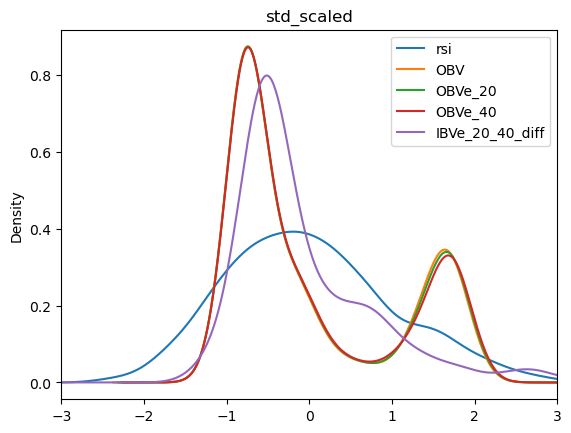

In [310]:
df_std_scaled.plot.kde()
plt.xlim(-3,3)
plt.title('std_scaled')
plt.show()

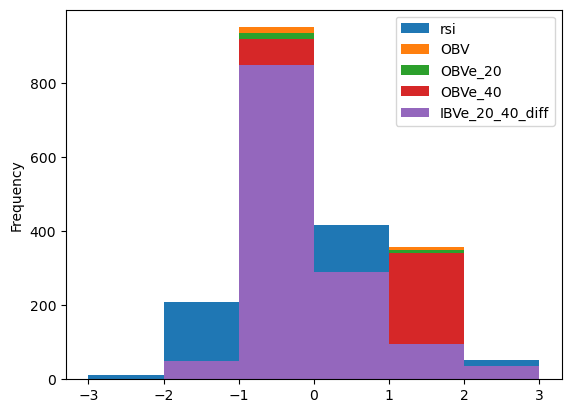

In [311]:
df_std_scaled.plot.hist(bins= [-3, -2, -1, 0, 1 ,2 ,3])
plt.show()

In [312]:
##### check how many data that more than 2 sd

(df_std_scaled > 2).any(1).sum()

100

In [313]:
df_std_scaled.iloc[:,-1].describe()

count   1,345.00
mean        0.00
std         1.00
min        -1.32
25%        -0.61
50%        -0.37
75%         0.36
max         4.65
Name: IBVe_20_40_diff, dtype: float64

In [314]:
df_std_scaled > 1.5

,rsi,OBV,OBVe_20,OBVe_40,IBVe_20_40_diff
datetime,,,,,
2018-04-17 07:00:00,False,False,False,False,False
2018-04-18 07:00:00,False,False,False,False,False
2018-04-19 07:00:00,False,False,False,False,False
2018-04-20 07:00:00,False,False,False,False,False
2018-04-21 07:00:00,False,False,False,False,False
...,...,...,...,...,...
2022-01-25 07:00:00,False,True,True,True,False
2022-01-26 07:00:00,False,True,True,True,False
2022-01-27 07:00:00,False,True,True,True,False


In [315]:
df_std_scaled.loc[~((df_std_scaled > 1.5) | (df_std_scaled < -1.5)).any(1)]

,rsi,OBV,OBVe_20,OBVe_40,IBVe_20_40_diff
datetime,,,,,
2018-04-17 07:00:00,NaN,-0.81,NaN,NaN,NaN
2018-04-18 07:00:00,NaN,-0.80,NaN,NaN,NaN
2018-04-19 07:00:00,NaN,-0.80,NaN,NaN,NaN
2018-04-20 07:00:00,NaN,-0.80,NaN,NaN,NaN
2018-04-21 07:00:00,NaN,-0.80,NaN,NaN,NaN
...,...,...,...,...,...
2021-05-01 07:00:00,0.53,1.45,1.45,1.42,0.76
2021-05-02 07:00:00,0.36,1.44,1.45,1.42,0.70
2021-05-03 07:00:00,0.55,1.45,1.45,1.42,0.67


In [316]:
df_low_sd = df_std_scaled.loc[~((df_std_scaled > 1.5) | (df_std_scaled < -1.5)).any(1)]

### loc data only inter +-2sd  >>>> change too 1.5sd because 2.0 its too much outlier

In [317]:
df_low_sd.describe()

,rsi,OBV,OBVe_20,OBVe_40,IBVe_20_40_diff
count,867.00,881.00,863.00,843.00,843.00
mean,-0.11,-0.52,-0.52,-0.52,-0.22
std,0.73,0.51,0.51,0.50,0.52
min,-1.49,-0.93,-0.92,-0.89,-1.29
25%,-0.72,-0.80,-0.80,-0.81,-0.57
50%,-0.09,-0.71,-0.71,-0.71,-0.39
75%,0.43,-0.37,-0.35,-0.35,-0.03
max,1.50,1.49,1.45,1.43,1.48


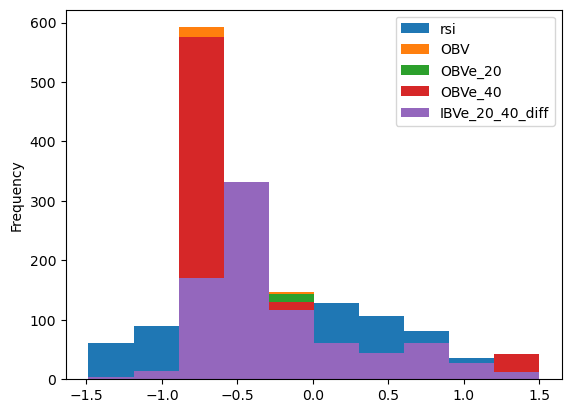

In [318]:
df_low_sd.plot.hist()
plt.show()

In [319]:
def enc_rsi(rsi):
    if rsi > 50:
        return 1
    elif rsi < 50:
        return 0
    # try 66 and 33 / 30 and 70

In [320]:
def enc_maobv(maobv):
    if maobv > 0:
        return 1
    elif maobv < 0:
        return 0

In [321]:
#### encode with base dataframe to get value for join with standardize data

df['strength'] = df['rsi'].apply(enc_rsi)
df['vol_in'] = df['IBVe_20_40_diff'].apply(enc_maobv)

In [322]:
######## get df join on stardardize df
df = df_low_sd.join(df[['close', 'open', 'strength', 'vol_in']])

In [323]:
df.head(50)

,rsi,OBV,OBVe_20,OBVe_40,IBVe_20_40_diff,close,open,strength,vol_in
datetime,,,,,,,,,
2018-04-17 07:00:00,NaN,-0.81,NaN,NaN,NaN,0.24,0.26,NaN,NaN
2018-04-18 07:00:00,NaN,-0.80,NaN,NaN,NaN,0.26,0.24,NaN,NaN
2018-04-19 07:00:00,NaN,-0.80,NaN,NaN,NaN,0.27,0.26,NaN,NaN
2018-04-20 07:00:00,NaN,-0.80,NaN,NaN,NaN,0.30,0.27,NaN,NaN
2018-04-21 07:00:00,NaN,-0.80,NaN,NaN,NaN,0.29,0.30,NaN,NaN
2018-04-22 07:00:00,NaN,-0.81,NaN,NaN,NaN,0.28,0.29,NaN,NaN
2018-04-23 07:00:00,NaN,-0.80,NaN,NaN,NaN,0.29,0.28,NaN,NaN
2018-04-24 07:00:00,NaN,-0.80,NaN,NaN,NaN,0.31,0.29,NaN,NaN
2018-04-25 07:00:00,NaN,-0.81,NaN,NaN,NaN,0.27,0.31,NaN,NaN


In [324]:
df.loc[df['vol_in'] == 0]

,rsi,OBV,OBVe_20,OBVe_40,IBVe_20_40_diff,close,open,strength,vol_in
datetime,,,,,,,,,
2018-05-26 07:00:00,-1.23,-0.82,-0.81,-0.80,-0.73,0.20,0.20,0.00,0.00
2018-05-27 07:00:00,-1.28,-0.83,-0.81,-0.80,-0.74,0.19,0.20,0.00,0.00
2018-05-29 07:00:00,-0.77,-0.82,-0.81,-0.80,-0.76,0.20,0.17,0.00,0.00
2018-05-30 07:00:00,-0.63,-0.81,-0.81,-0.80,-0.75,0.21,0.20,0.00,0.00
2018-05-31 07:00:00,-0.28,-0.80,-0.81,-0.80,-0.72,0.22,0.21,0.00,0.00
...,...,...,...,...,...,...,...,...,...
2020-11-09 07:00:00,0.32,-0.12,-0.10,-0.09,-0.58,0.11,0.11,1.00,0.00
2020-11-10 07:00:00,0.34,-0.10,-0.10,-0.09,-0.57,0.11,0.11,1.00,0.00
2020-11-11 07:00:00,0.35,-0.09,-0.10,-0.09,-0.55,0.11,0.11,1.00,0.00


In [325]:
df['signal'] = (df['vol_in'] == 1) & (df['strength'] == 1)

In [326]:
df.loc[df['signal'] == 0]

,rsi,OBV,OBVe_20,OBVe_40,IBVe_20_40_diff,close,open,strength,vol_in,signal
datetime,,,,,,,,,,
2018-04-17 07:00:00,NaN,-0.81,NaN,NaN,NaN,0.24,0.26,NaN,NaN,False
2018-04-18 07:00:00,NaN,-0.80,NaN,NaN,NaN,0.26,0.24,NaN,NaN,False
2018-04-19 07:00:00,NaN,-0.80,NaN,NaN,NaN,0.27,0.26,NaN,NaN,False
2018-04-20 07:00:00,NaN,-0.80,NaN,NaN,NaN,0.30,0.27,NaN,NaN,False
2018-04-21 07:00:00,NaN,-0.80,NaN,NaN,NaN,0.29,0.30,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...
2021-04-21 07:00:00,-0.32,1.42,1.43,1.38,1.22,1.20,1.27,0.00,1.00,False
2021-04-22 07:00:00,-0.60,1.39,1.42,1.39,1.11,1.14,1.20,0.00,1.00,False
2021-04-23 07:00:00,-0.51,1.45,1.43,1.39,1.08,1.16,1.14,0.00,1.00,False


In [327]:
# df['ret'] = df.close.pct_change()

In [328]:
# df['ret'] = df['ret'].shift(-1)

In [329]:
df['action_price'] = df['open'].shift(-1)

In [330]:
df.columns

Index(['rsi', 'OBV', 'OBVe_20', 'OBVe_40', 'IBVe_20_40_diff', 'close', 'open',
       'strength', 'vol_in', 'signal', 'action_price'],
      dtype='object')

In [331]:
df_encoded = df[['open', 'close', 'action_price', 'rsi', 'OBV', 'OBVe_20', 'OBVe_40', 'IBVe_20_40_diff', 'strength', 'vol_in', 'signal']]

In [332]:
df.isna().any(1).sum()

39

In [388]:
df_encoded.loc[(df_encoded['vol_in'] == 1) & (df_encoded['strength'] == 1)]

,open,close,action_price,rsi,OBV,OBVe_20,OBVe_40,IBVe_20_40_diff,strength,vol_in,signal,TS_Trends,TS_Trades,TS_Entries,TS_Exits
datetime,,,,,,,,,,,,,,,
2018-07-18 07:00:00,0.17,0.18,0.18,1.11,-0.78,-0.82,-0.82,-0.52,1.00,1.00,True,True,1,True,False
2018-07-19 07:00:00,0.18,0.18,0.18,1.15,-0.77,-0.82,-0.82,-0.45,1.00,1.00,True,True,0,False,False
2018-07-20 07:00:00,0.18,0.16,0.16,0.22,-0.78,-0.81,-0.82,-0.41,1.00,1.00,True,True,0,False,False
2018-07-21 07:00:00,0.16,0.16,0.16,0.29,-0.77,-0.81,-0.81,-0.36,1.00,1.00,True,True,0,False,False
2018-07-22 07:00:00,0.16,0.17,0.17,0.49,-0.76,-0.80,-0.81,-0.31,1.00,1.00,True,True,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-01 07:00:00,1.35,1.35,1.35,0.53,1.45,1.45,1.42,0.76,1.00,1.00,True,True,0,False,False
2021-05-02 07:00:00,1.35,1.33,1.33,0.36,1.44,1.45,1.42,0.70,1.00,1.00,True,True,0,False,False
2021-05-03 07:00:00,1.33,1.36,1.36,0.55,1.45,1.45,1.42,0.67,1.00,1.00,True,True,0,False,False


In [389]:
df_encoded.ta.tsignals(df_encoded['signal'], asbool= True, append= True)

C:\Anaconda3\lib\site-packages\pandas_ta\core.py:420: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,TS_Trends,TS_Trades,TS_Entries,TS_Exits
datetime,,,,
2018-04-17 07:00:00,False,0,False,False
2018-04-18 07:00:00,False,0,False,False
2018-04-19 07:00:00,False,0,False,False
2018-04-20 07:00:00,False,0,False,False
2018-04-21 07:00:00,False,0,False,False
...,...,...,...,...
2021-05-01 07:00:00,True,0,False,False
2021-05-02 07:00:00,True,0,False,False
2021-05-03 07:00:00,True,0,False,False


In [391]:
df_signal = df_encoded

In [392]:
# Be careful,  Calculating ret must happend with only trade != 0 dataframe
# need to get next day open before create Event dataframe

In [393]:
df_signal

,open,close,action_price,rsi,OBV,OBVe_20,OBVe_40,IBVe_20_40_diff,strength,vol_in,signal,TS_Trends,TS_Trades,TS_Entries,TS_Exits
datetime,,,,,,,,,,,,,,,
2018-04-17 07:00:00,0.26,0.24,0.24,NaN,-0.81,NaN,NaN,NaN,NaN,NaN,False,False,0,False,False
2018-04-18 07:00:00,0.24,0.26,0.26,NaN,-0.80,NaN,NaN,NaN,NaN,NaN,False,False,0,False,False
2018-04-19 07:00:00,0.26,0.27,0.27,NaN,-0.80,NaN,NaN,NaN,NaN,NaN,False,False,0,False,False
2018-04-20 07:00:00,0.27,0.30,0.30,NaN,-0.80,NaN,NaN,NaN,NaN,NaN,False,False,0,False,False
2018-04-21 07:00:00,0.30,0.29,0.29,NaN,-0.80,NaN,NaN,NaN,NaN,NaN,False,False,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-01 07:00:00,1.35,1.35,1.35,0.53,1.45,1.45,1.42,0.76,1.00,1.00,True,True,0,False,False
2021-05-02 07:00:00,1.35,1.33,1.33,0.36,1.44,1.45,1.42,0.70,1.00,1.00,True,True,0,False,False
2021-05-03 07:00:00,1.33,1.36,1.36,0.55,1.45,1.45,1.42,0.67,1.00,1.00,True,True,0,False,False


In [394]:
df_signal['ret'] = df_signal['action_price'].pct_change().shift(-1)
# shift only pct_Change back to where is signal happend, because action_price are already shifted

<ipython-input-394-82def4f90d91>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [395]:
df_signal['profit'] = df_signal['ret'] > 0

<ipython-input-395-ed5337423402>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [396]:
df_signal

,open,close,action_price,rsi,OBV,OBVe_20,OBVe_40,IBVe_20_40_diff,strength,vol_in,signal,TS_Trends,TS_Trades,TS_Entries,TS_Exits,ret,profit
datetime,,,,,,,,,,,,,,,,,
2018-04-17 07:00:00,0.26,0.24,0.24,NaN,-0.81,NaN,NaN,NaN,NaN,NaN,False,False,0,False,False,0.08,True
2018-04-18 07:00:00,0.24,0.26,0.26,NaN,-0.80,NaN,NaN,NaN,NaN,NaN,False,False,0,False,False,0.03,True
2018-04-19 07:00:00,0.26,0.27,0.27,NaN,-0.80,NaN,NaN,NaN,NaN,NaN,False,False,0,False,False,0.12,True
2018-04-20 07:00:00,0.27,0.30,0.30,NaN,-0.80,NaN,NaN,NaN,NaN,NaN,False,False,0,False,False,-0.05,False
2018-04-21 07:00:00,0.30,0.29,0.29,NaN,-0.80,NaN,NaN,NaN,NaN,NaN,False,False,0,False,False,-0.02,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-01 07:00:00,1.35,1.35,1.35,0.53,1.45,1.45,1.42,0.76,1.00,1.00,True,True,0,False,False,-0.02,False
2021-05-02 07:00:00,1.35,1.33,1.33,0.36,1.44,1.45,1.42,0.70,1.00,1.00,True,True,0,False,False,0.03,True
2021-05-03 07:00:00,1.33,1.36,1.36,0.55,1.45,1.45,1.42,0.67,1.00,1.00,True,True,0,False,False,-0.07,False


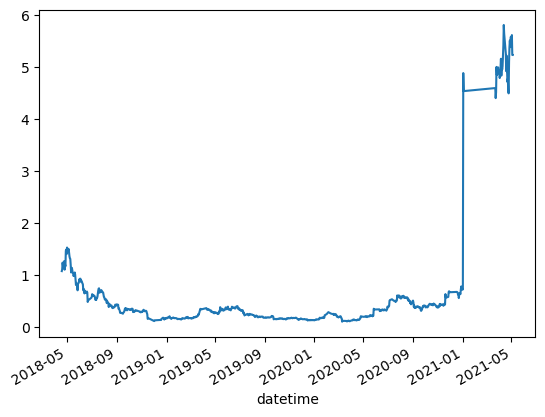

In [397]:
(df_signal['ret']+1).cumprod().plot()
plt.show()

# trading cumulative return

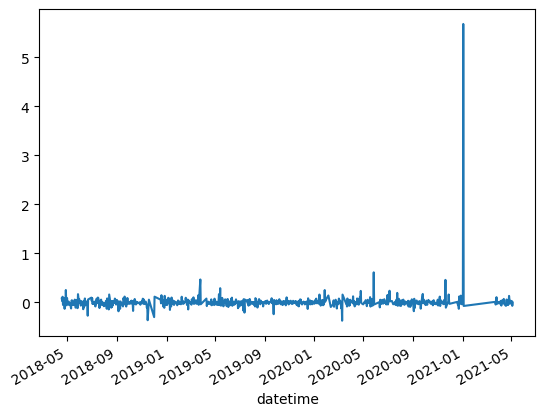

In [398]:
(df_signal['ret']).plot()
plt.show()

# trading return

In [399]:
benchmark = (df_signal['close'].iloc[-1]) / (df_signal['open'].iloc[0])
print(f'benchmark return= {benchmark}')

benchmark return= 5.791554146608743


In [400]:
df_ml = df_signal

In [401]:
df_ml.columns

Index(['open', 'close', 'action_price', 'rsi', 'OBV', 'OBVe_20', 'OBVe_40',
       'IBVe_20_40_diff', 'strength', 'vol_in', 'signal', 'TS_Trends',
       'TS_Trades', 'TS_Entries', 'TS_Exits', 'ret', 'profit'],
      dtype='object')

In [402]:
df_ml = df_ml[['rsi', 'OBV', 'OBVe_20', 'OBVe_40', 'IBVe_20_40_diff', 'strength', 'vol_in', 'profit']]

In [417]:
df_ml = df_ml.dropna()
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 843 entries, 2018-05-26 07:00:00 to 2021-05-05 07:00:00
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rsi              843 non-null    float64
 1   OBV              843 non-null    float64
 2   OBVe_20          843 non-null    float64
 3   OBVe_40          843 non-null    float64
 4   IBVe_20_40_diff  843 non-null    float64
 5   strength         843 non-null    float64
 6   vol_in           843 non-null    float64
 7   profit           843 non-null    bool   
dtypes: bool(1), float64(7)
memory usage: 53.5 KB


In [412]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [418]:
X_train = df_ml.iloc[:700, :-1]

In [419]:
y_train = df_ml.iloc[:700, -1:]

In [420]:
X_train

,rsi,OBV,OBVe_20,OBVe_40,IBVe_20_40_diff,strength,vol_in
datetime,,,,,,,
2018-05-26 07:00:00,-1.23,-0.82,-0.81,-0.80,-0.73,0.00,0.00
2018-05-27 07:00:00,-1.28,-0.83,-0.81,-0.80,-0.74,0.00,0.00
2018-05-29 07:00:00,-0.77,-0.82,-0.81,-0.80,-0.76,0.00,0.00
2018-05-30 07:00:00,-0.63,-0.81,-0.81,-0.80,-0.75,0.00,0.00
2018-05-31 07:00:00,-0.28,-0.80,-0.81,-0.80,-0.72,0.00,0.00
...,...,...,...,...,...,...,...
2020-08-27 07:00:00,-1.38,-0.19,-0.16,-0.16,-0.35,0.00,1.00
2020-08-28 07:00:00,-1.21,-0.18,-0.16,-0.16,-0.38,0.00,1.00
2020-08-29 07:00:00,-0.67,-0.17,-0.16,-0.16,-0.39,0.00,1.00


In [421]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state= 10)

In [422]:
rf = RandomForestClassifier(n_estimators= 100, max_depth= 3, random_state= 14)

In [423]:
rf.fit(X_train, y_train)

<ipython-input-423-168a6fc83696>:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier(max_depth=3, random_state=14)

# live_test

#### ต้องใช้signal ธรรมดามาสร้าง action เพื่อฟีลเตอร์order เข้ามาก่อน และใช้ ML เป็นตัวตัดสินใจสุดท้าย ว่าจะทำอะไร  
##### ไม่สามารถที่จะใช้ ML มากำหนด action เพียวๆในทุกวันได้

prepare data for live predict and backtest

In [424]:
df_ml.columns

Index(['rsi', 'OBV', 'OBVe_20', 'OBVe_40', 'IBVe_20_40_diff', 'strength',
       'vol_in', 'profit'],
      dtype='object')

In [425]:
### ดึงข้อมูลในส่วนที่เป็น live test มา
df_live = df_ml.iloc[700:]

In [426]:
df_live

,rsi,OBV,OBVe_20,OBVe_40,IBVe_20_40_diff,strength,vol_in,profit
datetime,,,,,,,,
2020-09-01 07:00:00,-0.09,-0.11,-0.15,-0.15,-0.29,0.00,1.00,False
2020-09-02 07:00:00,-0.65,-0.13,-0.15,-0.15,-0.27,0.00,1.00,False
2020-09-03 07:00:00,-1.46,-0.17,-0.15,-0.15,-0.30,0.00,1.00,True
2020-09-04 07:00:00,-1.01,-0.13,-0.15,-0.15,-0.27,0.00,1.00,False
2020-09-05 07:00:00,-1.38,-0.16,-0.15,-0.15,-0.30,0.00,1.00,True
...,...,...,...,...,...,...,...,...
2021-05-01 07:00:00,0.53,1.45,1.45,1.42,0.76,1.00,1.00,False
2021-05-02 07:00:00,0.36,1.44,1.45,1.42,0.70,1.00,1.00,True
2021-05-03 07:00:00,0.55,1.45,1.45,1.42,0.67,1.00,1.00,False


In [427]:
# เอาราคามา join เข้ากับ dataframe ที่มี feature (X)
df_live = df_live.join(df_signal['action_price'])

create new dataframe with only nesscesary column

In [428]:
df_live.head()

,rsi,OBV,OBVe_20,OBVe_40,IBVe_20_40_diff,strength,vol_in,profit,action_price
datetime,,,,,,,,,
2020-09-01 07:00:00,-0.09,-0.11,-0.15,-0.15,-0.29,0.00,1.00,False,0.12
2020-09-02 07:00:00,-0.65,-0.13,-0.15,-0.15,-0.27,0.00,1.00,False,0.11
2020-09-03 07:00:00,-1.46,-0.17,-0.15,-0.15,-0.30,0.00,1.00,True,0.09
2020-09-04 07:00:00,-1.01,-0.13,-0.15,-0.15,-0.27,0.00,1.00,False,0.10
2020-09-05 07:00:00,-1.38,-0.16,-0.15,-0.15,-0.30,0.00,1.00,True,0.09


In [429]:
#set X and y test

X_live_test = df_live.iloc[:, :-2]
y_live_test = df_live.iloc[:, -2:-1]

In [430]:
X_live_test

,rsi,OBV,OBVe_20,OBVe_40,IBVe_20_40_diff,strength,vol_in
datetime,,,,,,,
2020-09-01 07:00:00,-0.09,-0.11,-0.15,-0.15,-0.29,0.00,1.00
2020-09-02 07:00:00,-0.65,-0.13,-0.15,-0.15,-0.27,0.00,1.00
2020-09-03 07:00:00,-1.46,-0.17,-0.15,-0.15,-0.30,0.00,1.00
2020-09-04 07:00:00,-1.01,-0.13,-0.15,-0.15,-0.27,0.00,1.00
2020-09-05 07:00:00,-1.38,-0.16,-0.15,-0.15,-0.30,0.00,1.00
...,...,...,...,...,...,...,...
2021-05-01 07:00:00,0.53,1.45,1.45,1.42,0.76,1.00,1.00
2021-05-02 07:00:00,0.36,1.44,1.45,1.42,0.70,1.00,1.00
2021-05-03 07:00:00,0.55,1.45,1.45,1.42,0.67,1.00,1.00


In [431]:
y_live_pred = rf.predict(X_live_test)

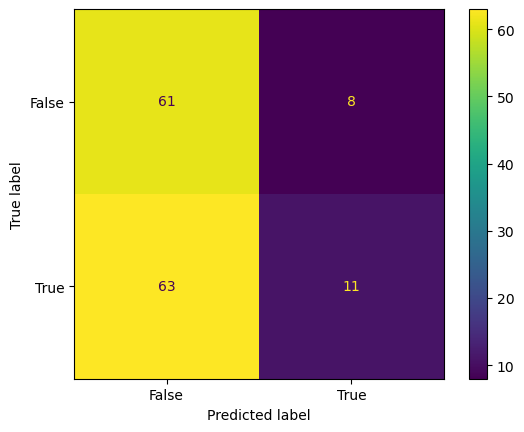

In [432]:
plot_confusion_matrix(rf, X_live_test, y_live_test)
plt.show()

prepare data for vectorbt เอาราคาทุกวันและ ค่าy ที่predict ได้มาaction เริ่มตั้งแต่วันแรกของtest data (live) เพื่อมาลองเทส

In [433]:
df_live_backtest = X_live_test
df_live_backtest['action_price'] = df_live['action_price']
df_live_backtest['predict'] = y_live_pred
#df_live_backtest['ret'] = df['close'].pct_change().shift(-1)
#df_live_backtest['profit'] = df_live_backtest['ret'] > 0

In [434]:
df_live_backtest

,rsi,OBV,OBVe_20,OBVe_40,IBVe_20_40_diff,strength,vol_in,action_price,predict
datetime,,,,,,,,,
2020-09-01 07:00:00,-0.09,-0.11,-0.15,-0.15,-0.29,0.00,1.00,0.12,False
2020-09-02 07:00:00,-0.65,-0.13,-0.15,-0.15,-0.27,0.00,1.00,0.11,True
2020-09-03 07:00:00,-1.46,-0.17,-0.15,-0.15,-0.30,0.00,1.00,0.09,True
2020-09-04 07:00:00,-1.01,-0.13,-0.15,-0.15,-0.27,0.00,1.00,0.10,True
2020-09-05 07:00:00,-1.38,-0.16,-0.15,-0.15,-0.30,0.00,1.00,0.09,True
...,...,...,...,...,...,...,...,...,...
2021-05-01 07:00:00,0.53,1.45,1.45,1.42,0.76,1.00,1.00,1.35,False
2021-05-02 07:00:00,0.36,1.44,1.45,1.42,0.70,1.00,1.00,1.33,False
2021-05-03 07:00:00,0.55,1.45,1.45,1.42,0.67,1.00,1.00,1.36,False


In [435]:
signal_vectorbt = df_live_backtest.ta.tsignals(df_live_backtest['predict'], asbool= True, append= True)
signal_vectorbt

,TS_Trends,TS_Trades,TS_Entries,TS_Exits
datetime,,,,
2020-09-01 07:00:00,False,0,False,False
2020-09-02 07:00:00,True,1,True,False
2020-09-03 07:00:00,True,0,False,False
2020-09-04 07:00:00,True,0,False,False
2020-09-05 07:00:00,True,0,False,False
...,...,...,...,...
2021-05-01 07:00:00,False,0,False,False
2021-05-02 07:00:00,False,0,False,False
2021-05-03 07:00:00,False,0,False,False


In [436]:
port = vbt.Portfolio.from_signals(
    df_live_backtest['action_price'],
    entries= signal_vectorbt.TS_Entries,
    exits= signal_vectorbt.TS_Exits,
    freq= '1D',
    init_cash= 100,
    fees= 0.0025,
    slippage= 0.0050
)

In [437]:
port.plot().show()

In [ ]:
port.get_drawdowns().plot().show()

In [ ]:
port.plot_underwater()

FigureWidget({
    'data': [{'fill': 'tozeroy',
              'fillcolor': 'rgba(220,57,18,0.3000)',
         …

In [ ]:
port.stats()

C:\Anaconda3\lib\site-packages\vectorbt\portfolio\trades.py:446: RuntimeWarning:

divide by zero encountered in true_divide



Start                         2020-10-09 07:00:00
End                           2021-04-26 07:00:00
Period                           13 days 00:00:00
Start Value                                100.00
End Value                                  131.72
Total Return [%]                            31.72
Benchmark Return [%]                     1,121.45
Max Gross Exposure [%]                     100.00
Total Fees Paid                              3.45
Max Drawdown [%]                             0.75
Max Drawdown Duration             2 days 00:00:00
Total Trades                                    6
Total Closed Trades                             6
Total Open Trades                               0
Open Trade P&L                               0.00
Win Rate [%]                               100.00
Best Trade [%]                              10.64
Worst Trade [%]                              1.35
Avg Winning Trade [%]                        4.77
Avg Losing Trade [%]                          NaN


In [ ]:
return_adjust_vol = port.annualized_return() / port.annualized_volatility()
print(f'return adjust vol: {return_adjust_vol}')
print(f'alpha: {port.alpha()}')

return adjust vol: 3.9001484038171004
alpha: 0.9914016257300675


In [ ]:
# making grid search to optimize randomforest parameters

In [ ]:
4/11

0.36363636363636365